## Zillow Home Value Index (ZHVI)
A measure of the typical home value and market changes across a given region and housing type

`https://www.zillow.com/research/data/`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt  


df_home_value = pd.read_csv("/Users/aleskamedrano/Downloads/Code for posting (Jan. 2024)/Data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
#df_home_value.head(5)
ny_df = df_home_value[df_home_value["RegionName"] == "New York, NY"]
#ny_df.head(5)

#Plot time series
#df_home_value.columns
df_long = ny_df.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    var_name='Date',
    value_name='HomeValue'
)

# Convert the Date column to datetime format
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Sort by date (optional but good practice)
df_long = df_long.sort_values('Date')

# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(df_long['Date'], df_long['HomeValue'], color='navy')
plt.title(f"Home Value Over Time — {df_long['RegionName'].iloc[0]}")
plt.xlabel("Date")
plt.ylabel("Home Value (USD)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pandas'

### The Value of Homes in NYC has drastically increased over time. Now I'm intersted in trying to see how muhc it has increased overtime, by calculating the growth rates every year.

/var/folders/ws/jw7vmdhx3yq2zps6fh4r4wmc0000gn/T/ipykernel_34256/159103663.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df_long.resample('Y').last()


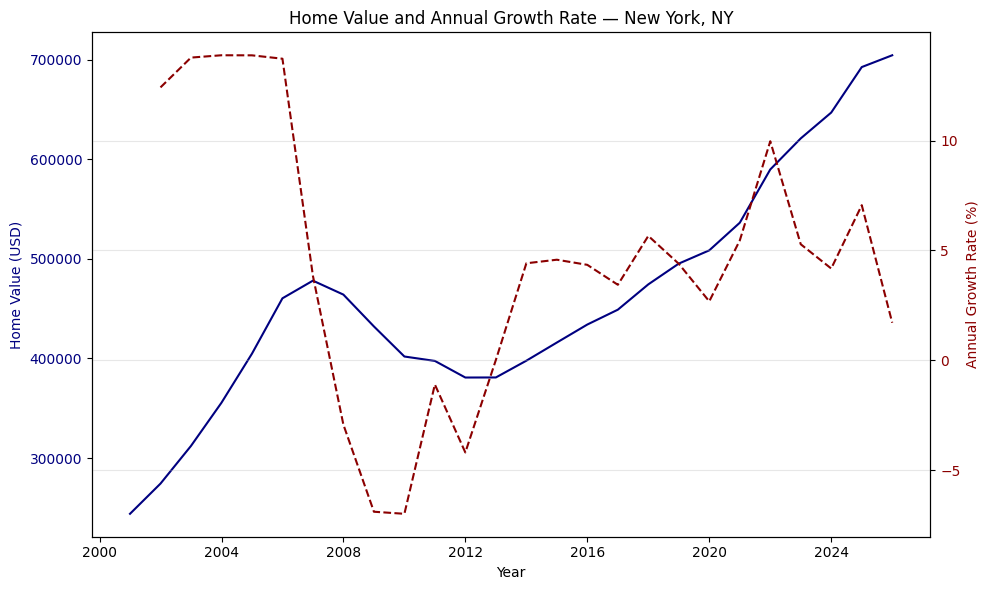

In [10]:
import pandas as pd
import matplotlib.pyplot as plt  

# --- Load and filter data ---
df_home_value = pd.read_csv("/Users/aleskamedrano/Downloads/Code for posting (Jan. 2024)/Data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
ny_df = df_home_value[df_home_value["RegionName"] == "New York, NY"]

# --- Reshape the data ---
df_long = ny_df.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    var_name='Date',
    value_name='HomeValue'
)
df_long['Date'] = pd.to_datetime(df_long['Date'])
df_long = df_long.sort_values('Date').set_index('Date')

# --- Convert monthly data to annual (use last value of each year) ---
df_yearly = df_long.resample('Y').last()

# --- Compute annual growth rate (YoY %) ---
df_yearly['Annual_Growth_Rate'] = df_yearly['HomeValue'].pct_change() * 100

# --- Plot both Home Value and Annual Growth Rate ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis: home values
ax1.plot(df_yearly.index, df_yearly['HomeValue'], color='navy', label='Home Value')
ax1.set_xlabel('Year')
ax1.set_ylabel('Home Value (USD)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

# Right axis: annual growth rate
ax2 = ax1.twinx()
ax2.plot(df_yearly.index, df_yearly['Annual_Growth_Rate'], color='darkred', linestyle='--', label='Annual Growth Rate')
ax2.set_ylabel('Annual Growth Rate (%)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title(f"Home Value and Annual Growth Rate — {df_long['RegionName'].iloc[0]}")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Rent - Zillow (ZORI)
A smoothed measure of the typical observed market rate rent across a given region.

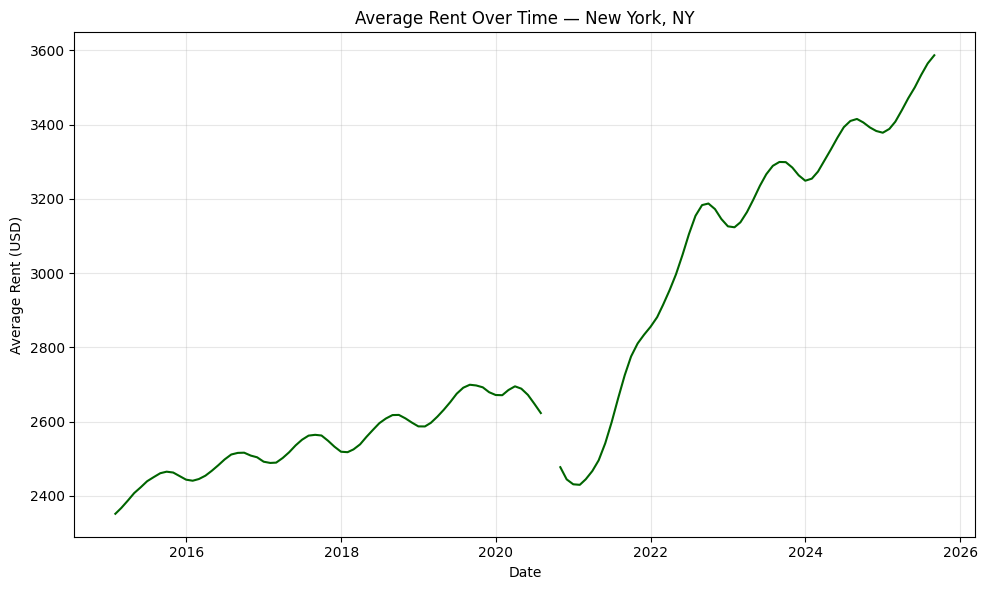

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df_rent = pd.read_csv("/Users/aleskamedrano/Downloads/Code for posting (Jan. 2024)/Data/rent_zillow_monthly.csv")
#df_rent.head(5)
df_rent_ny = df_rent[df_rent["RegionName"] == "New York, NY"]
#df_rent_ny.head()

#df_rent_ny.columns
df_rent_long = df_rent_ny.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    var_name='Date',
    value_name='Rent'
)

# --- Convert Date column to datetime ---
df_rent_long['Date'] = pd.to_datetime(df_rent_long['Date'])
df_rent_long = df_rent_long.sort_values('Date')

# --- Plot the time series ---
plt.figure(figsize=(10,6))
plt.plot(df_rent_long['Date'], df_rent_long['Rent'], color='darkgreen')
plt.title(f"Average Rent Over Time — {df_rent_long['RegionName'].iloc[0]}")
plt.xlabel("Date")
plt.ylabel("Average Rent (USD)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

There's a gap in Zillow's data 

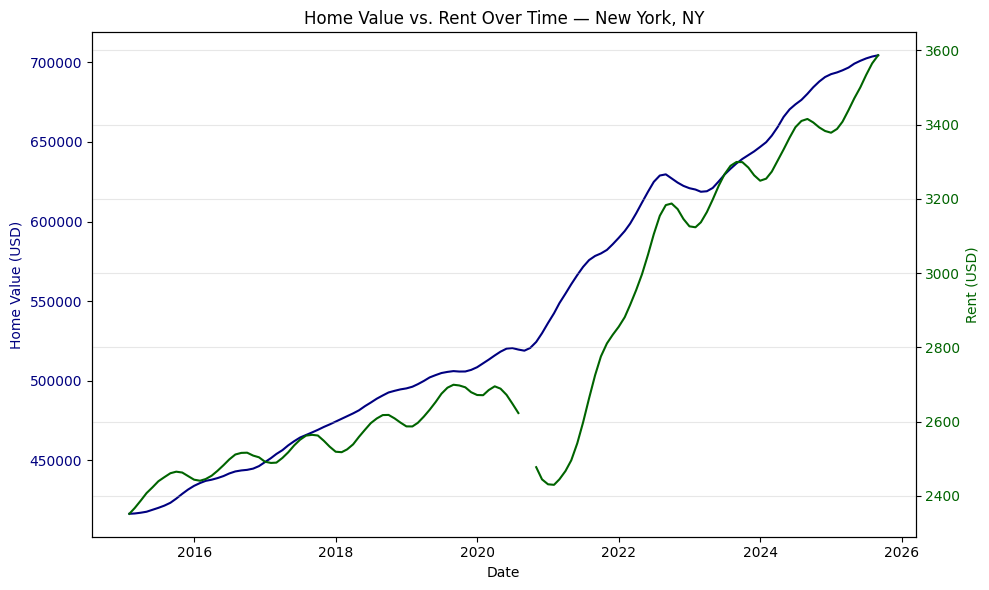

In [26]:
# Merge on Date (inner join keeps only overlapping months)
df_compare = pd.merge(
    df_long.reset_index()[['Date', 'HomeValue']], 
    df_rent_long.reset_index()[['Date', 'Rent']], 
    on='Date', 
    how='inner'
)

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis: Home Value
ax1.plot(df_compare['Date'], df_compare['HomeValue'], color='navy', label='Home Value')
ax1.set_xlabel('Date')
ax1.set_ylabel('Home Value (USD)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

# Right axis: Rent
ax2 = ax1.twinx()
ax2.plot(df_compare['Date'], df_compare['Rent'], color='darkgreen', linestyle='-', label='Rent')
ax2.set_ylabel('Rent (USD)', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title("Home Value vs. Rent Over Time — New York, NY")
plt.grid(alpha=0.3)
fig.tight_layout()
plt.show()


As house value has increased overtime, the rental rates have also increased. Now lets turn to observe how the market has reacted to the increase in house value by looking at the sales

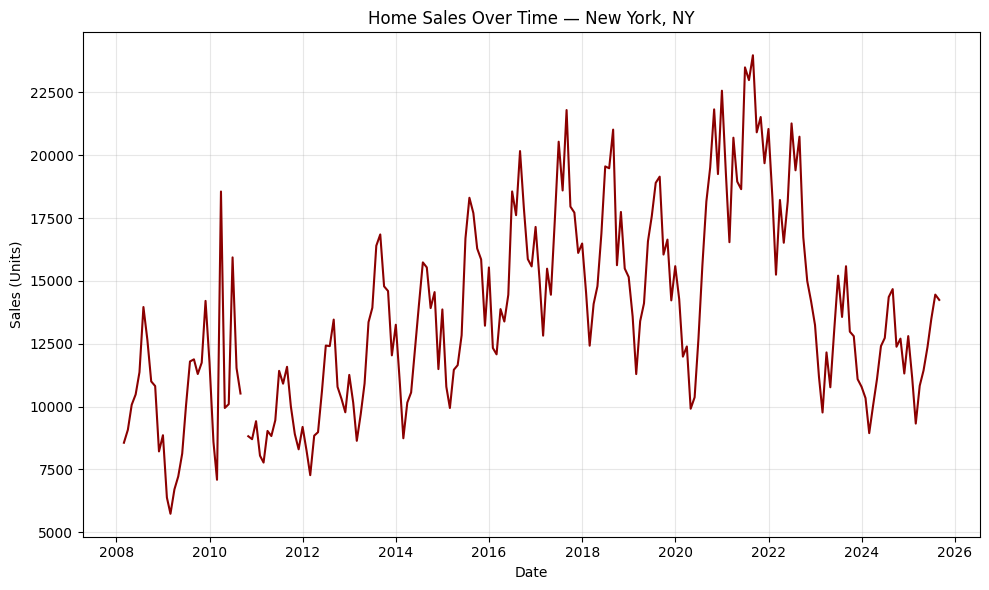

In [31]:
df_sales = pd.read_csv("/Users/aleskamedrano/Downloads/Code for posting (Jan. 2024)/Data/sales_zillow_monthly.csv")
#df_sales.head(5)
df_sales_ny = df_sales[df_sales["RegionName"] == "New York, NY"]
#df_sales_ny.head(4)
df_sales_ny.columns

df_sales_long = df_sales_ny.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    var_name='Date',
    value_name='Sales'
)

# Convert Date to datetime
df_sales_long['Date'] = pd.to_datetime(df_sales_long['Date'])

# Sort by Date
df_sales_long = df_sales_long.sort_values('Date')

# Plot
plt.figure(figsize=(10,6))
plt.plot(df_sales_long['Date'], df_sales_long['Sales'], color='darkred')
plt.title(f"Home Sales Over Time — {df_sales_long['RegionName'].iloc[0]}")
plt.xlabel("Date")
plt.ylabel("Sales (Units)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




## Sales have been incredibly volatile in NY since 2008

## New Mortgages Issued by State

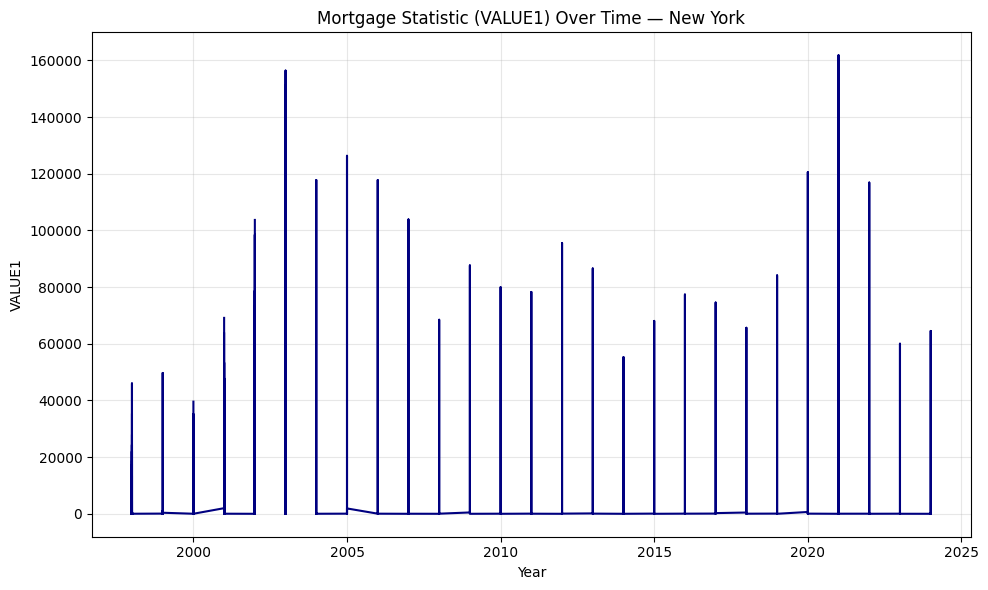

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_mortgages_by_state = pd.read_csv("/Users/aleskamedrano/Downloads/Code for posting (Jan. 2024)/Data/new-mortgage-statistics-states-annual.csv")

# Filter for New York
df_mortgages_ny = df_mortgages_by_state[df_mortgages_by_state["GEOID"] == "NY"]

# Sort by year (in case it’s unordered)
df_mortgages_ny = df_mortgages_ny.sort_values("YEAR")

# Plot VALUE1 over time
plt.figure(figsize=(10,6))
plt.plot(df_mortgages_ny["YEAR"], df_mortgages_ny["VALUE1"], color='navy')
plt.title("Mortgage Statistic (VALUE1) Over Time — New York")
plt.xlabel("Year")
plt.ylabel("VALUE1")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/ws/jw7vmdhx3yq2zps6fh4r4wmc0000gn/T/ipykernel_35965/922457506.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_mortgages_ny_2000["GrowthRate"] = df_mortgages_ny_2000["VALUE1"].pct_change() * 100
/var/folders/ws/jw7vmdhx3yq2zps6fh4r4wmc0000gn/T/ipykernel_35965/922457506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mortgages_ny_2000["GrowthRate"] = df_mortgages_ny_2000["VALUE1"].pct_change() * 100


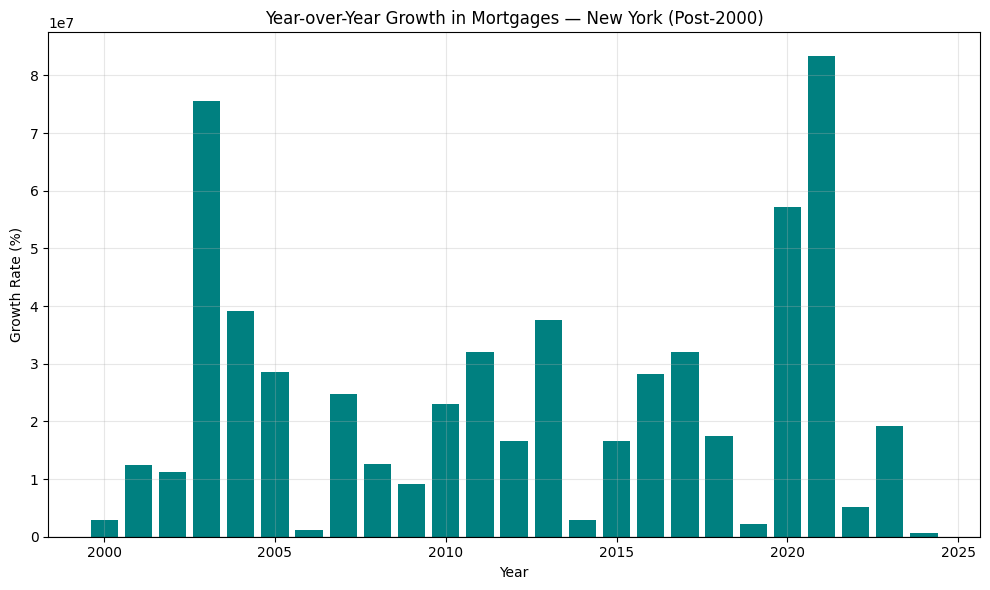

In [12]:
df_mortgages_ny_2000 = df_mortgages_ny[df_mortgages_ny["YEAR"] >= 2000]
df_mortgages_ny_2000["GrowthRate"] = df_mortgages_ny_2000["VALUE1"].pct_change() * 100

plt.figure(figsize=(10,6))
plt.bar(df_mortgages_ny_2000["YEAR"], df_mortgages_ny_2000["GrowthRate"], color='teal')
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Year-over-Year Growth in Mortgages — New York (Post-2000)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Function format for plotting moortgage YoY growth for States of interest

/var/folders/ws/jw7vmdhx3yq2zps6fh4r4wmc0000gn/T/ipykernel_35965/140985982.py:22: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_state["GrowthRate"] = df_state[value_col].pct_change() * 100


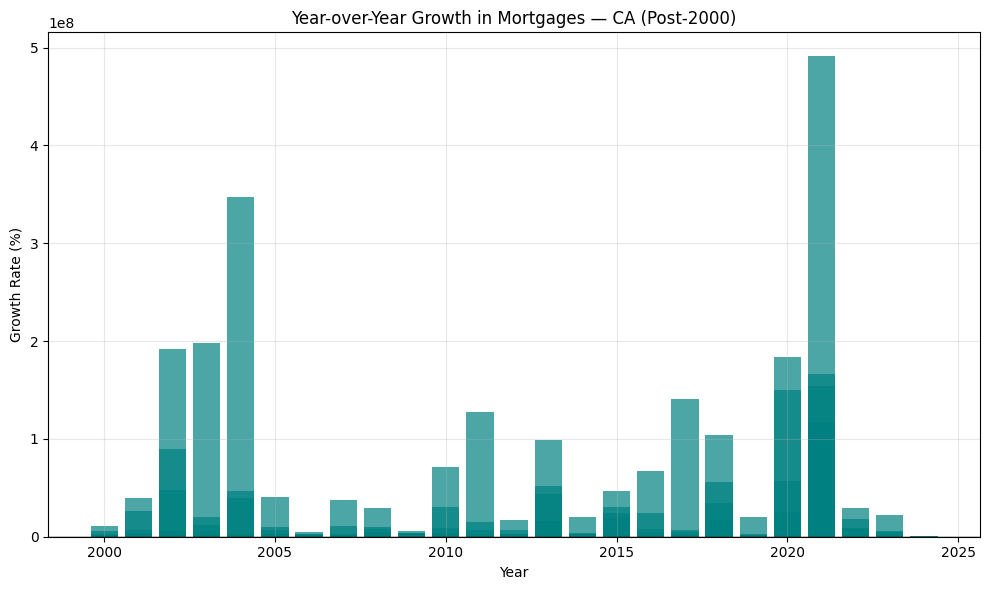

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_yoy_mortgage_growth(df, state_code, value_col="VALUE1"):
    """
    Plots year-over-year growth in mortgage activity for a given U.S. state.

    Parameters:
    - df: pandas DataFrame with columns ['GEOID', 'YEAR', value_col]
    - state_code: string, e.g. 'MA' for Massachusetts
    - value_col: string, column representing the mortgage metric (default='VALUE1')
    """

    # Filter for selected state
    df_state = df[df["GEOID"] == state_code].copy()
    if df_state.empty:
        print(f"No data found for state code '{state_code}'.")
        return

    # Sort and calculate growth
    df_state = df_state.sort_values("YEAR")
    df_state["GrowthRate"] = df_state[value_col].pct_change() * 100

    # Keep only years after 2000 (optional)
    df_state = df_state[df_state["YEAR"] >= 2000]

    # Plot
    plt.figure(figsize=(10,6))
    plt.bar(df_state["YEAR"], df_state["GrowthRate"], color="teal", alpha=0.7)
    plt.axhline(0, color="black", linewidth=1)
    plt.title(f"Year-over-Year Growth in Mortgages — {state_code} (Post-2000)")
    plt.xlabel("Year")
    plt.ylabel("Growth Rate (%)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage:
df_mortgages = pd.read_csv("/Users/aleskamedrano/Downloads/Code for posting (Jan. 2024)/Data/new-mortgage-statistics-states-annual.csv")

plot_yoy_mortgage_growth(df_mortgages, state_code="CA")


`Statistical measure to remember:`
- mean = df['column_name'].mean()       # Mean
- median = df['column_name'].median()   # Median
- minimum = df['column_name'].min()     # Minimum
- maximum = df['column_name'].max()     # Maximum
- range_val = maximum - minimum         # Range
- std_dev = df['column_name'].std()     # Standard Deviation
- variance = df['column_name'].var()    # Variance


## Inflaition Expectation UMichigan

Maximum values:
 MICH    10.4
dtype: float64

Minimum values:
 MICH    0.4
dtype: float64

Range (max - min):
 MICH    10.0
dtype: float64


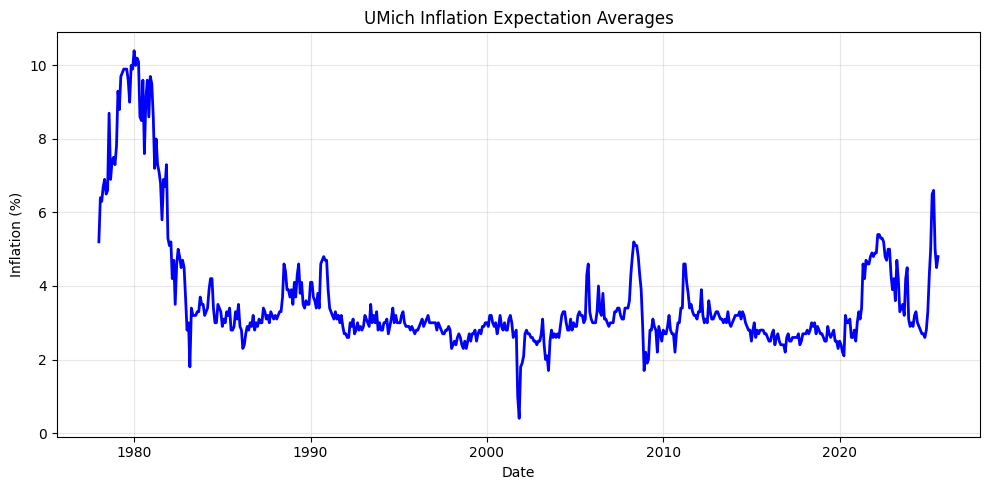

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df_inf_exp = pd.read_csv("/Users/aleskamedrano/Downloads/Code for posting (Jan. 2024)/Data/UMich_Inflaition Expectation.csv")

# Compute descriptive stats for numeric columns only
numeric_df = df_inf_exp.select_dtypes(include='number')

maximum = numeric_df.max()
minimum = numeric_df.min()
value_range = maximum - minimum

print("Maximum values:\n", maximum)
print("\nMinimum values:\n", minimum)
print("\nRange (max - min):\n", value_range)

# Convert date column (adjust column name if needed)
df_inf_exp['Date'] = pd.to_datetime(df_inf_exp['observation_date'])

# Plot inflation expectations
plt.figure(figsize=(10,5))
plt.plot(df_inf_exp['Date'], df_inf_exp['MICH'], color='blue', linewidth=2)
plt.title("UMich Inflation Expectation Averages")
plt.xlabel("Date")
plt.ylabel("Inflation (%)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



## CPI Levels

In [ ]:
#Review what is wrong e=with thisb plot
import matplotlib.pyplot as plt
import pandas as pd
import smplotlib

# Load dataset
df_CPI_city_avg = pd.read_csv("/Users/aleskamedrano/Downloads/Code for posting (Jan. 2024)/Data/CPI_cityAverage.csv")

# Check first rows to understand column names
print(df_CPI_city_avg.head())


# Convert 'Date' column to datetime format if not already
df_CPI_city_avg['Date'] = pd.to_datetime(df_inf_exp['observation_date'])

# Plot inflation expectations
plt.figure(figsize=(10,5))
plt.plot(df_CPI_city_avg['Date'], df_CPI_city_avg['CPIAUCSL'], color='blue', linewidth=2)
plt.title("Average CPI for Cities in the US")
plt.xlabel("Date")
plt.ylabel("CPI City Averages")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


: 

# Research Official Beginning

`Research Progress`
1. Download all data
2. Clean the data and fix if it is not pegged to inflaiiton - use IPO research
3. Build model

`CPI DATA` - I downloaded the CPI data and will calculate inflaition between 2004 and 2024

`1. Here I did a test run of the code to retribe data from the Bereau of Labor and Statistics`
## CPI-U, All Urban Consumers, U.S. city average, all items, not seasonally adjusted

In [9]:
import requests
import pandas as pd

API_KEY = "a02c43cd1ae541af907bef2afbb6f4d5"  # your actual key (no period)

# CPI-U, All Urban Consumers, U.S. city average, all items, not seasonally adjusted
series_id = "CUUR0000SA0"

data = {
    "seriesid": [series_id],
    "startyear": "2004",
    "endyear": "2024",
    "registrationkey": API_KEY
}

response = requests.post("https://api.bls.gov/publicAPI/v2/timeseries/data/", json=data)
json_data = response.json()

# Step 1: Inspect what you got
print(json_data)  # <--- key step!

# Step 2: Handle errors safely
if "Results" in json_data:
    records = json_data["Results"]["series"][0]["data"]
    df = pd.DataFrame(records)
    df["value"] = df["value"].astype(float)
    df["year"] = df["year"].astype(int)
    df = df.sort_values(["year", "period"], ascending=[True, True])
    print(df.head())
else:
    print("No results found. Error message from API:")
    print(json_data.get("message", "No message provided."))

df = pd.DataFrame(records)
df["value"] = df["value"].astype(float)
df["year"] = df["year"].astype(int)
df = df.sort_values(["year", "period"], ascending=[True, True])
df.to_csv("test_cpi_data.csv", index=False)




{'status': 'REQUEST_SUCCEEDED', 'responseTime': 122, 'message': ['Year range has been reduced to the system-allowed limit of 20 years.'], 'Results': {'series': [{'seriesID': 'CUUR0000SA0', 'data': [{'year': '2023', 'period': 'M12', 'periodName': 'December', 'value': '306.746', 'footnotes': [{}]}, {'year': '2023', 'period': 'M11', 'periodName': 'November', 'value': '307.051', 'footnotes': [{}]}, {'year': '2023', 'period': 'M10', 'periodName': 'October', 'value': '307.671', 'footnotes': [{}]}, {'year': '2023', 'period': 'M09', 'periodName': 'September', 'value': '307.789', 'footnotes': [{}]}, {'year': '2023', 'period': 'M08', 'periodName': 'August', 'value': '307.026', 'footnotes': [{}]}, {'year': '2023', 'period': 'M07', 'periodName': 'July', 'value': '305.691', 'footnotes': [{}]}, {'year': '2023', 'period': 'M06', 'periodName': 'June', 'value': '305.109', 'footnotes': [{}]}, {'year': '2023', 'period': 'M05', 'periodName': 'May', 'value': '304.127', 'footnotes': [{}]}, {'year': '2023', 

## `This is my actual data set`

## All Urban Consumers (CPI-U), All items, Northeast region, not seasonally adjusted

In [1]:
import requests
import pandas as pd

API_KEY = "a02c43cd1ae541af907bef2afbb6f4d5"  # your actual key (no period)


series_id = "CUUR0100SA0"

data = {
    "seriesid": [series_id],
    "startyear": "2004",
    "endyear": "2024",
    "registrationkey": API_KEY
}

response = requests.post("https://api.bls.gov/publicAPI/v2/timeseries/data/", json=data)
json_data = response.json()

# Step 1: Inspect what you got
print(json_data)  # <--- key step!

# Step 2: Handle errors safely
if "Results" in json_data:
    records = json_data["Results"]["series"][0]["data"]
    df = pd.DataFrame(records)
    df["value"] = df["value"].astype(float)
    df["year"] = df["year"].astype(int)
    df = df.sort_values(["year", "period"], ascending=[True, True])
    print(df.head())
else:
    print("No results found. Error message from API:")
    print(json_data.get("message", "No message provided."))

df = pd.DataFrame(records)
df["value"] = df["value"].astype(float)
df["year"] = df["year"].astype(int)
df = df.sort_values(["year", "period"], ascending=[True, True])
df.to_csv("northeast_cpi_data.csv", index=False)




/var/folders/ws/jw7vmdhx3yq2zps6fh4r4wmc0000gn/T/ipykernel_796/1832006038.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


{'status': 'REQUEST_SUCCEEDED', 'responseTime': 123, 'message': ['Year range has been reduced to the system-allowed limit of 20 years.'], 'Results': {'series': [{'seriesID': 'CUUR0100SA0', 'data': [{'year': '2023', 'period': 'M12', 'periodName': 'December', 'value': '316.143', 'footnotes': [{}]}, {'year': '2023', 'period': 'M11', 'periodName': 'November', 'value': '316.252', 'footnotes': [{}]}, {'year': '2023', 'period': 'M10', 'periodName': 'October', 'value': '316.300', 'footnotes': [{}]}, {'year': '2023', 'period': 'M09', 'periodName': 'September', 'value': '316.373', 'footnotes': [{}]}, {'year': '2023', 'period': 'M08', 'periodName': 'August', 'value': '315.441', 'footnotes': [{}]}, {'year': '2023', 'period': 'M07', 'periodName': 'July', 'value': '313.952', 'footnotes': [{}]}, {'year': '2023', 'period': 'M06', 'periodName': 'June', 'value': '313.329', 'footnotes': [{}]}, {'year': '2023', 'period': 'M05', 'periodName': 'May', 'value': '312.241', 'footnotes': [{}]}, {'year': '2023', 

## All Urban Consumers (CPI-U), All items, Midwest region, not seasonally adjusted

In [2]:
import requests
import pandas as pd

API_KEY = "a02c43cd1ae541af907bef2afbb6f4d5"  # your actual key (no period)


series_id = "CUUR0200SA0"

data = {
    "seriesid": [series_id],
    "startyear": "2004",
    "endyear": "2024",
    "registrationkey": API_KEY
}

response = requests.post("https://api.bls.gov/publicAPI/v2/timeseries/data/", json=data)
json_data = response.json()

# Step 1: Inspect what you got
print(json_data)  # <--- key step!

# Step 2: Handle errors safely
if "Results" in json_data:
    records = json_data["Results"]["series"][0]["data"]
    df = pd.DataFrame(records)
    df["value"] = df["value"].astype(float)
    df["year"] = df["year"].astype(int)
    df = df.sort_values(["year", "period"], ascending=[True, True])
    print(df.head())
else:
    print("No results found. Error message from API:")
    print(json_data.get("message", "No message provided."))

df = pd.DataFrame(records)
df["value"] = df["value"].astype(float)
df["year"] = df["year"].astype(int)
df = df.sort_values(["year", "period"], ascending=[True, True])
df.to_csv("midwest_cpi_data.csv", index=False)




{'status': 'REQUEST_SUCCEEDED', 'responseTime': 126, 'message': ['Year range has been reduced to the system-allowed limit of 20 years.'], 'Results': {'series': [{'seriesID': 'CUUR0200SA0', 'data': [{'year': '2023', 'period': 'M12', 'periodName': 'December', 'value': '283.908', 'footnotes': [{}]}, {'year': '2023', 'period': 'M11', 'periodName': 'November', 'value': '284.539', 'footnotes': [{}]}, {'year': '2023', 'period': 'M10', 'periodName': 'October', 'value': '284.981', 'footnotes': [{}]}, {'year': '2023', 'period': 'M09', 'periodName': 'September', 'value': '285.276', 'footnotes': [{}]}, {'year': '2023', 'period': 'M08', 'periodName': 'August', 'value': '285.122', 'footnotes': [{}]}, {'year': '2023', 'period': 'M07', 'periodName': 'July', 'value': '284.640', 'footnotes': [{}]}, {'year': '2023', 'period': 'M06', 'periodName': 'June', 'value': '283.741', 'footnotes': [{}]}, {'year': '2023', 'period': 'M05', 'periodName': 'May', 'value': '282.656', 'footnotes': [{}]}, {'year': '2023', 

## All Urban Consumers (CPI-U), All items, South region, not seasonally adjusted

In [3]:
import requests
import pandas as pd

API_KEY = "a02c43cd1ae541af907bef2afbb6f4d5"  # your actual key (no period)


series_id = "CUUR0300SA0"

data = {
    "seriesid": [series_id],
    "startyear": "2004",
    "endyear": "2024",
    "registrationkey": API_KEY
}

response = requests.post("https://api.bls.gov/publicAPI/v2/timeseries/data/", json=data)
json_data = response.json()

# Step 1: Inspect what you got
print(json_data)  # <--- key step!

# Step 2: Handle errors safely
if "Results" in json_data:
    records = json_data["Results"]["series"][0]["data"]
    df = pd.DataFrame(records)
    df["value"] = df["value"].astype(float)
    df["year"] = df["year"].astype(int)
    df = df.sort_values(["year", "period"], ascending=[True, True])
    print(df.head())
else:
    print("No results found. Error message from API:")
    print(json_data.get("message", "No message provided."))

df = pd.DataFrame(records)
df["value"] = df["value"].astype(float)
df["year"] = df["year"].astype(int)
df = df.sort_values(["year", "period"], ascending=[True, True])
df.to_csv("south_cpi_data.csv", index=False)




{'status': 'REQUEST_SUCCEEDED', 'responseTime': 114, 'message': ['Year range has been reduced to the system-allowed limit of 20 years.'], 'Results': {'series': [{'seriesID': 'CUUR0300SA0', 'data': [{'year': '2023', 'period': 'M12', 'periodName': 'December', 'value': '298.754', 'footnotes': [{}]}, {'year': '2023', 'period': 'M11', 'periodName': 'November', 'value': '298.930', 'footnotes': [{}]}, {'year': '2023', 'period': 'M10', 'periodName': 'October', 'value': '299.394', 'footnotes': [{}]}, {'year': '2023', 'period': 'M09', 'periodName': 'September', 'value': '299.657', 'footnotes': [{}]}, {'year': '2023', 'period': 'M08', 'periodName': 'August', 'value': '298.975', 'footnotes': [{}]}, {'year': '2023', 'period': 'M07', 'periodName': 'July', 'value': '297.279', 'footnotes': [{}]}, {'year': '2023', 'period': 'M06', 'periodName': 'June', 'value': '296.789', 'footnotes': [{}]}, {'year': '2023', 'period': 'M05', 'periodName': 'May', 'value': '295.889', 'footnotes': [{}]}, {'year': '2023', 

## All Urban Consumers (CPI-U), All items, West region, not seasonally adjusted

In [4]:
import requests
import pandas as pd

API_KEY = "a02c43cd1ae541af907bef2afbb6f4d5"  # your actual key (no period)


series_id = "CUUR0400SA0"

data = {
    "seriesid": [series_id],
    "startyear": "2004",
    "endyear": "2024",
    "registrationkey": API_KEY
}

response = requests.post("https://api.bls.gov/publicAPI/v2/timeseries/data/", json=data)
json_data = response.json()

# Step 1: Inspect what you got
print(json_data)  # <--- key step!

# Step 2: Handle errors safely
if "Results" in json_data:
    records = json_data["Results"]["series"][0]["data"]
    df = pd.DataFrame(records)
    df["value"] = df["value"].astype(float)
    df["year"] = df["year"].astype(int)
    df = df.sort_values(["year", "period"], ascending=[True, True])
    print(df.head())
else:
    print("No results found. Error message from API:")
    print(json_data.get("message", "No message provided."))

df = pd.DataFrame(records)
df["value"] = df["value"].astype(float)
df["year"] = df["year"].astype(int)
df = df.sort_values(["year", "period"], ascending=[True, True])
df.to_csv("west_cpi_data.csv", index=False)




{'status': 'REQUEST_SUCCEEDED', 'responseTime': 113, 'message': ['Year range has been reduced to the system-allowed limit of 20 years.'], 'Results': {'series': [{'seriesID': 'CUUR0400SA0', 'data': [{'year': '2023', 'period': 'M12', 'periodName': 'December', 'value': '325.932', 'footnotes': [{}]}, {'year': '2023', 'period': 'M11', 'periodName': 'November', 'value': '326.299', 'footnotes': [{}]}, {'year': '2023', 'period': 'M10', 'periodName': 'October', 'value': '327.708', 'footnotes': [{}]}, {'year': '2023', 'period': 'M09', 'periodName': 'September', 'value': '327.491', 'footnotes': [{}]}, {'year': '2023', 'period': 'M08', 'periodName': 'August', 'value': '326.234', 'footnotes': [{}]}, {'year': '2023', 'period': 'M07', 'periodName': 'July', 'value': '324.865', 'footnotes': [{}]}, {'year': '2023', 'period': 'M06', 'periodName': 'June', 'value': '324.448', 'footnotes': [{}]}, {'year': '2023', 'period': 'M05', 'periodName': 'May', 'value': '323.525', 'footnotes': [{}]}, {'year': '2023', 

## `Here I will Calculate inflation on Month-Month Basis and YoY Basis for the 4 regions of interest`

### Northeast

In [5]:
import pandas as pd

# Read your dataset
df = pd.read_csv("/Users/aleskamedrano/Real_Estate_SeminarFall2025/northeast_cpi_data.csv")

# Convert and clean data
df["value"] = pd.to_numeric(df["value"], errors="coerce")
df["month"] = df["period"].str.extract(r'M(\d+)').astype(int)
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")

# Sort chronologically
df = df.sort_values("date")

# Calculate inflation rates
df["monthly_inflation_%"] = df["value"].pct_change() * 100
df["yoy_inflation_%"] = df["value"].pct_change(12) * 100

# Save to CSV file
df.to_csv("northeast_inflation.csv", index=False)



## Midwest

In [6]:
import pandas as pd

# Read your dataset
df = pd.read_csv("/Users/aleskamedrano/Real_Estate_SeminarFall2025/midwest_cpi_data.csv")

# Convert and clean data
df["value"] = pd.to_numeric(df["value"], errors="coerce")
df["month"] = df["period"].str.extract(r'M(\d+)').astype(int)
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")

# Sort chronologically
df = df.sort_values("date")

# Calculate inflation rates
df["monthly_inflation_%"] = df["value"].pct_change() * 100
df["yoy_inflation_%"] = df["value"].pct_change(12) * 100

# Save to CSV file
df.to_csv("midwest_inflation.csv", index=False)



## South

In [7]:
import pandas as pd

# Read your dataset
df = pd.read_csv("/Users/aleskamedrano/Real_Estate_SeminarFall2025/south_cpi_data.csv")

# Convert and clean data
df["value"] = pd.to_numeric(df["value"], errors="coerce")
df["month"] = df["period"].str.extract(r'M(\d+)').astype(int)
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")

# Sort chronologically
df = df.sort_values("date")

# Calculate inflation rates
df["monthly_inflation_%"] = df["value"].pct_change() * 100
df["yoy_inflation_%"] = df["value"].pct_change(12) * 100

# Save to CSV file
df.to_csv("south_inflation.csv", index=False)



## West

In [8]:
import pandas as pd

# Read your dataset
df = pd.read_csv("/Users/aleskamedrano/Real_Estate_SeminarFall2025/west_cpi_data.csv")

# Convert and clean data
df["value"] = pd.to_numeric(df["value"], errors="coerce")
df["month"] = df["period"].str.extract(r'M(\d+)').astype(int)
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")

# Sort chronologically
df = df.sort_values("date")

# Calculate inflation rates
df["monthly_inflation_%"] = df["value"].pct_change() * 100
df["yoy_inflation_%"] = df["value"].pct_change(12) * 100

# Save to CSV file
df.to_csv("west_inflation.csv", index=False)



## `Methdology`

# Constructing Experience with Inflaition 

In [ ]:
import pandas as pd
import numpy as np

def compute_experienced_inflation(df, inflation_series):
    """
    Compute experienced inflation using linearly-declining weights, 
    as in Malmendier & Steiny Wellsjo (2024).

    Parameters
    ----------
    df : pandas DataFrame
        Must contain columns:
        - birth_year
        - survey_year
        - immigration_year (optional; include if using immigrant sample)
        - origin_country (optional)
        - current_country

    inflation_series : pandas DataFrame
        Must contain columns:
        - country
        - year
        - inflation   (annual CPI inflation rate as a decimal)

    Returns
    -------
    pandas Series of each individual's experienced inflation.
    """

    exp_list = []

    for idx, row in df.iterrows():

        birth = row["birth_year"]
        last_year = row["survey_year"] - 1  # experiences up to last completed year
        age = last_year - birth + 1         # number of inflation observations

        # Handle immigrants:
        # use origin country until immigration year - 1
        # use current (destination) country for all later years
        if "immigration_year" in row and not pd.isna(row["immigration_year"]):
            imm = row["immigration_year"]
            origin = row.get("origin_country", row.get("country", None))
            dest = row.get("current_country", origin)

            # Build yearly inflation for this individual
            years = list(range(birth, last_year + 1))
            infl = []
            for yr in years:
                if yr < imm:
                    infl_val = inflation_series.loc[
                        (inflation_series.country == origin) &
                        (inflation_series.year == yr), "inflation"
                    ]
                else:
                    infl_val = inflation_series.loc[
                        (inflation_series.country == dest) &
                        (inflation_series.year == yr), "inflation"
                    ]

                infl.append(infl_val.values[0] if len(infl_val) > 0 else np.nan)

        else:
            # Non-immigrants (e.g., HFCS sample)
            country = row.get("current_country", None)
            years = list(range(birth, last_year + 1))

            infl = [
                inflation_series.loc[
                    (inflation_series.country == country) &
                    (inflation_series.year == yr), "inflation"
                ].values[0]
                for yr in years
            ]

        infl = np.array(infl)
        valid = ~np.isnan(infl)  # remove any missing years

        # Linear decaying weights: most recent year gets highest weight
        weights = np.arange(1, sum(valid) + 1)  # 1 ... age
        weights = weights / weights.sum()

        exp_infl = np.sum(infl[valid] * weights)

        exp_list.append(exp_infl)

    return pd.Series(exp_list, index=df.index)


## Infaltion data set:

In [6]:
import pandas as pd

# Load your four inflation datasets
ne = pd.read_csv("/Users/aleskamedrano/Real_Estate_SeminarFall2025/northeast_inflation.csv")
mw = pd.read_csv("/Users/aleskamedrano/Real_Estate_SeminarFall2025/midwest_inflation.csv")
we = pd.read_csv("/Users/aleskamedrano/Real_Estate_SeminarFall2025/west_inflation.csv")
so = pd.read_csv("/Users/aleskamedrano/Real_Estate_SeminarFall2025/south_inflation.csv")

# Add a column identifying which region each dataset belongs to
ne["region"] = "Northeast"
mw["region"] = "Midwest"
we["region"] = "West"
so["region"] = "South"

#Combine into a single data frame:
inflation_regional = pd.concat([ne, mw, we, so], ignore_index=True)

#Clean data:
inflation_regional = inflation_regional[[
    "region",
    "year",
    "month",
    "date",
    "value",
    "monthly_inflation_%",
    "yoy_inflation_%"
]]

#Keep only the relevant inflaiiton markers for annual inflaition
inflation_regional = inflation_regional.rename(columns={
    "region": "country",
    "yoy_inflation_%": "inflation"
})

# Make inflaition a decimal
inflation_regional["inflation"] = inflation_regional["inflation"] / 100

#Savign Inflaition data set:
inflation_regional.to_csv("inflation_all_regions.csv", index=False)



## ACS Data

In [ ]:
import pandas as pd

cols = [
    "YEAR","AGE","BPL","YRSUSA1","OWNERSHP","HHINCOME",
    "STATEFIP","REGION","EDUC","MARST","CITIZEN",
    "EMPSTAT","PERWT","HHWT"
]

df = pd.read_csv("ACS_Data_USA.csv.gz", usecols=cols, low_memory=False)



In [ ]:
import pandas as pd

chunks = pd.read_csv(
    "ACS_Data_USA.csv.gz",
    chunksize=500000,   # adjust to 250k if needed
    usecols=[
        "YEAR","AGE","BPL","YRSUSA1","OWNERSHP","HHINCOME",
        "STATEFIP","REGION","EDUC","MARST","CITIZEN",
        "EMPSTAT","PERWT","HHWT"
    ],
    low_memory=False
)

df = pd.concat(chunks)



In [5]:
df.head(10)

,YEAR,HHWT,REGION,STATEFIP,OWNERSHP,HHINCOME,PERWT,AGE,MARST,BPL,CITIZEN,YRSUSA1,EDUC,EMPSTAT
0,2000,110.0,32,1,2,70100,140.0,31,1,1,0,0,8,1
1,2000,110.0,32,1,2,70100,126.0,25,1,1,0,0,8,1
2,2000,110.0,32,1,2,70100,125.0,0,6,1,0,0,0,0
3,2000,31.0,32,1,2,17000,31.0,22,1,1,0,0,3,1
4,2000,31.0,32,1,2,17000,32.0,35,1,1,0,0,6,1
5,2000,31.0,32,1,2,17000,31.0,19,6,1,0,0,3,1
6,2000,31.0,32,1,2,17000,47.0,18,6,1,0,0,5,1
7,2000,141.0,32,1,2,13000,141.0,23,6,51,0,0,10,1
8,2000,94.0,32,1,1,102400,78.0,56,1,12,0,0,6,1
9,2000,94.0,32,1,1,102400,94.0,56,1,1,0,0,6,3


Had a major crashout with data. My kernels were not running so we had to convert data from pandas and use parquet and pyarrow. I have to use np for every column to do the analysis from here

In [ ]:
import pyarrow as pa
import pyarrow.csv as csv
import pyarrow.parquet as pq

# Path to your ACS file (2018–2023 CSV)
acs_path = "/Users/aleskamedrano/Real_Estate_SeminarFall2025/ACS_2018_2023.csv"

# Read as Arrow table (streaming)
table = csv.read_csv(acs_path)

# Save as Parquet in row groups (500k rows per group)
pq.write_table(
    table,
    "ACS_2018_2023.parquet",
    row_group_size=500000
)

print("Parquet file saved.")


: 

`Load Inflaition Data Set`

In [ ]:
import pandas as pd

infl = pd.read_csv("inflation_all_regions.csv")

infl = infl[["country", "year", "inflation"]].dropna()

# Convert to numpy for speed
infl_by_region = {}

for region in infl["country"].unique():
    sub = infl[infl["country"] == region].sort_values("year")
    infl_by_region[region] = (
        sub["year"].to_numpy(),
        sub["inflation"].to_numpy()
    )

print("Inflation data prepared.")


`Region Mapping Function`

In [ ]:
import numpy as np

# State → Region mapping
def map_region(state):
    if state in [9,10,11,23,25,33,34,36,42,44,50]:
        return "Northeast"
    if state in [17,18,19,20,26,27,29,31,38,39,46,55]:
        return "Midwest"
    if state in [1,5,12,13,21,22,28,37,40,45,47,48,51,54]:
        return "South"
    return "West"


`Inflation Experience Function`

In [ ]:
def inflation_experience(region, birth_year, survey_year):
    if region not in infl_by_region:
        return np.nan
    
    years, infl_vals = infl_by_region[region]
    
    mask = (years >= birth_year) & (years < survey_year)
    vals = infl_vals[mask]
    
    if len(vals) == 0:
        return np.nan
    
    # Recency weights
    w = np.arange(1, len(vals)+1)
    w = w / w.sum()
    
    return np.sum(vals * w)


`Process ACS data in batches & built clean data set`

In [ ]:
import pyarrow.dataset as ds

dataset = ds.dataset("ACS_2018_2023.parquet", format="parquet")

# Columns you need
cols = [
    "YEAR","AGE","BPL","YRSUSA1","OWNERSHP","HHINCOME",
    "STATEFIP","REGION","EDUC","MARST","CITIZEN",
    "EMPSTAT","PERWT","HHWT"
]

# Directory for output (clean parquet dataset)
import os
output_path = "ACS_cleaned_dataset"
os.makedirs(output_path, exist_ok=True)

# Batch scanner
scanner = dataset.to_batches(columns=cols, batch_size=100000)

for batch_num, batch in enumerate(scanner):

    print(f"Processing batch {batch_num}…")
    
    df = batch.to_pandas()

    # Clean missing codes
    df = df.replace({0: None, 9999999: None, 999999: None})

    # Derived variables
    df["birth_year"] = df["YEAR"] - df["AGE"]
    df["immigration_year"] = df["YEAR"] - df["YRSUSA1"]

    # Region name
    df["region_name"] = df["STATEFIP"].apply(map_region)

    # Merge inflation (for survey year)
    # simple lookup
    df["inflation"] = [
        infl_by_region.get(r, ([], []))[1][infl_by_region.get(r, ([], []))[0] == y][0]
        if (r in infl_by_region and y in infl_by_region[r][0])
        else np.nan
        for r, y in zip(df["region_name"], df["YEAR"])
    ]

    # Compute inflation experience
    df["inflation_experience"] = df.apply(
        lambda r: inflation_experience(
            r["region_name"], 
            r["birth_year"], 
            r["YEAR"]
        ),
        axis=1
    )

    # Convert back to Arrow and save
    batch_table = pa.Table.from_pandas(df)
    
    pq.write_table(
        batch_table,
        f"{output_path}/batch_{batch_num}.parquet"
    )

print("All batches processed and saved!")


`Load clean data fro regressions`

`Create Homeownership Outcome`

`Run baseline regression model`